In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline

In [2]:
blanco_100 = "#fcfcfc"
blanco_200 = "#f1f1f3"
gris_300   = "#d5d8dd"
gris_500   = "#8f949e"
negro_700  = "#454a54"
negro_800  = "#2f3541"
negro_900  = "#1e252f"

rojo_clarisimo  = "#f0d0d3"
rojo_claro      = "#dc9ea1"
rojo_primario   = "#be6069"
rojo_oscuro     = "#96545d"
rojo_oscurisimo = "#63454f"

naranja_clarisimo  = "#fcd7ca"
naranja_claro      = "#f8bca5"
naranja_primario   = "#ec926f"
naranja_oscuro     = "#ab7463"
naranja_oscurisimo = "#6a504e"

amarillo_clarisimo  = "#fff3d1"
amarillo_claro      = "#ffe7a3"
amarillo_primario   = "#fbdb65"
amarillo_oscuro     = "#b19c5d"
amarillo_oscurisimo = "#6a624e"

verde_clarisimo  = "#d2e9de"
verde_claro      = "#a4d5be"
verde_primario   = "#76c1a1"
verde_oscuro     = "#5d8e7e"
verde_oscurisimo = "#436564"

azul_clarisimo  = "#d9e6fc"
azul_claro      = "#b7d1fb"
azul_primario   = "#8fbbfa"
azul_oscuro     = "#6b88b3"
azul_oscurisimo = "#4c5d76"

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.linestyle'] = '-'

plt.rcParams['font.family'] = 'Inter'
plt.rcParams['lines.linewidth'] = 1
#plt.rcParams['font.serif'] = 'Ubuntu'
#plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size']        = 10

plt.rcParams['axes.labelsize']   = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize']   = 14
plt.rcParams['axes.linewidth']   = 0.7
plt.rcParams['axes.edgecolor']   = negro_700
plt.rcParams['figure.facecolor']        = blanco_100

plt.rcParams['xtick.labelsize']  = 8
plt.rcParams['ytick.labelsize']  = 8
plt.rcParams['figure.titlesize'] = 12
#plt.rcParams['legend.fontsize'] = 10

In [3]:
df_esferas_movimiento = pd.read_csv('./csv/CB_esferas_d10_a100_n10_moving.csv')

In [105]:
def crear_grafica(df, titulo, filename, save_to_file = False, filepath = "../docs/img/graficas"):
    # df está preparado para haber sido leído desde `afterburner_parser.py`
    width, height = plt.figaspect(0.56)
    plt.figure(figsize=(width,height), dpi=400)

    # Quitar los ejes innecesarios
    ax = plt.axes()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.set_xticks([])

    # change the ax color
    #ax.spines['left'].set_color(negro_700)

    # get the average of df['Frametime']
    media = round(df['Frametime'].mean(), 2)
    
    plt.title(titulo)
    
    plt.plot(
        df['Frametime'], 
        color=verde_primario, 
        label="Avg: " + str(media) + "ms"
    )

    plt.axhline(y=33, color=rojo_oscurisimo, linestyle='--')
    plt.legend(loc="best")
    #plt.xlabel("Tiempo")
    plt.ylabel("Frametime (ms)")
    
    # Texto abajo a la izquierda
    left, width = -0.05, .75
    bottom, height = -0.05, .5
    ax.text(left, bottom, '(lower is better)',
        horizontalalignment = 'left',
        verticalalignment   = 'top',
        transform           = ax.transAxes
    )
    
    if save_to_file:
        if not os.path.exists(filepath):
            os.mkdir(filepath)
        
        file = os.path.join(filepath, filename) +'.png'
        
        print(f"Guardando en el archivo {file}")
        plt.savefig(file)

    return plt

Guardando en el archivo ../docs/img/graficas\CB_esferas_d10_a100_n10_moving.png


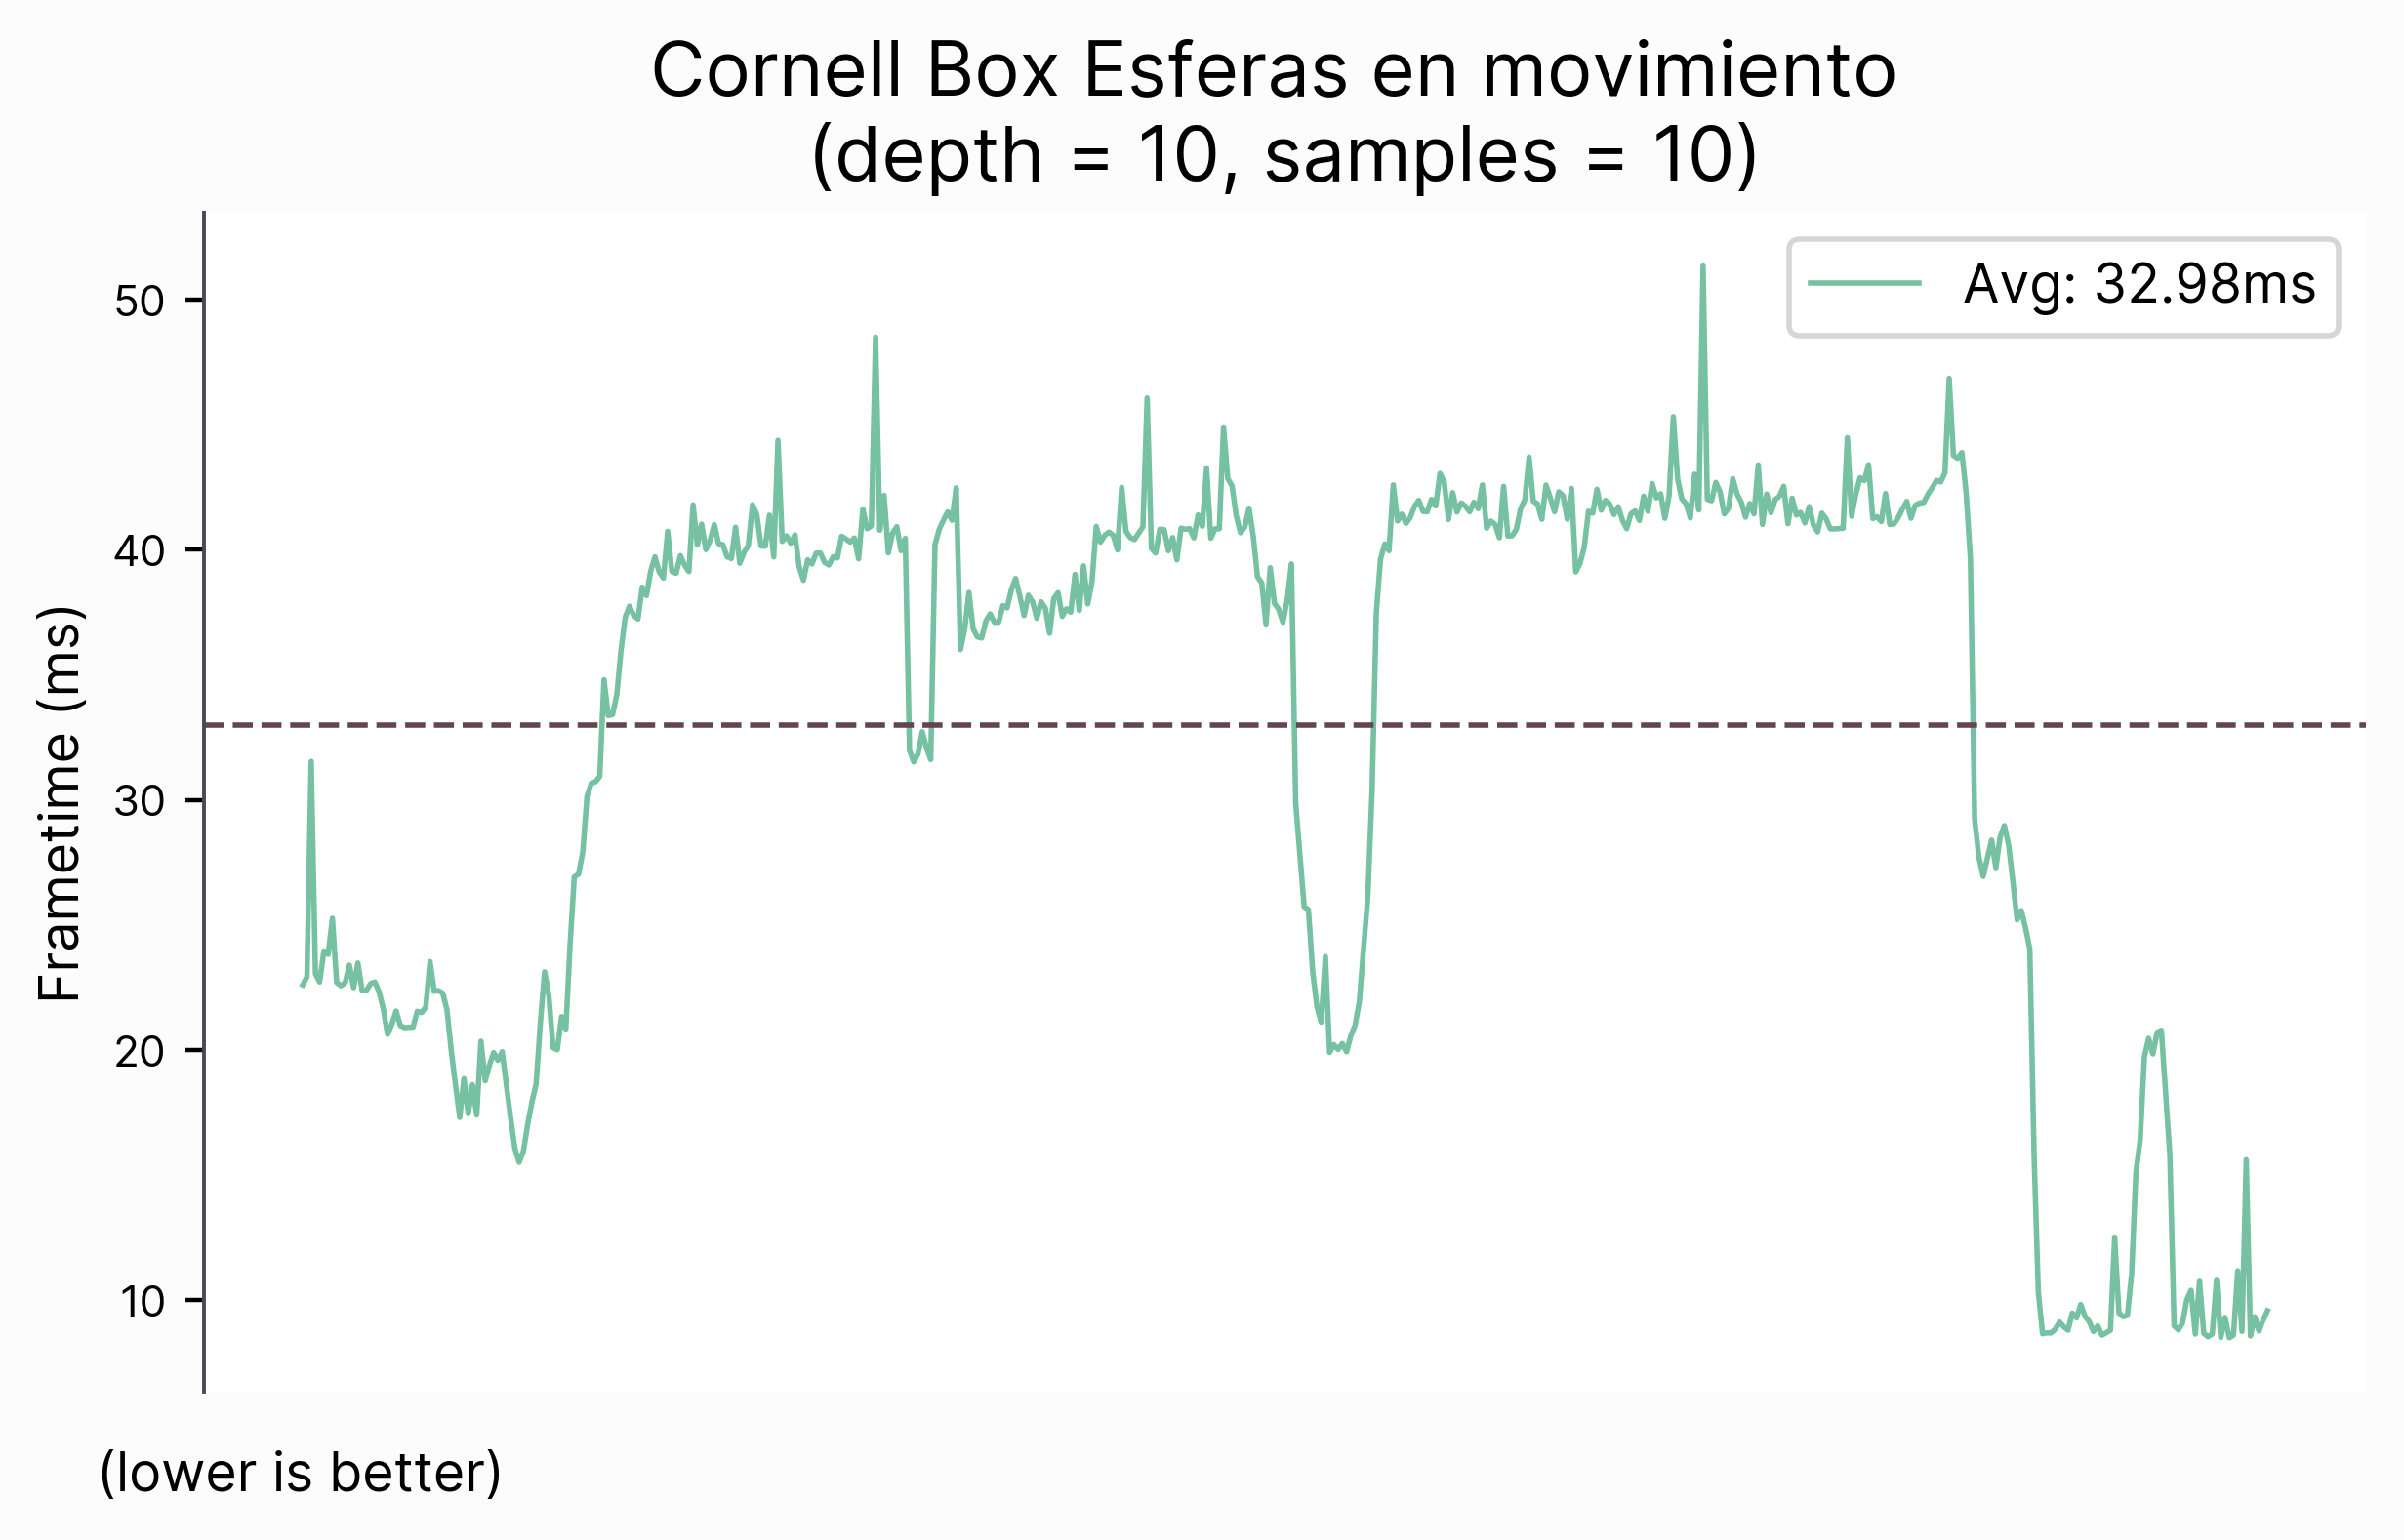

In [106]:
df_esferas_movimiento = pd.read_csv('./csv/CB_esferas_d10_a100_n10_moving.csv')
crear_grafica(
    df_esferas_movimiento, 
    "Cornell Box Esferas en movimiento \n(depth = 10, samples = 10)", 
    "CB_esferas_d10_a100_n10_moving", 
    True
).show()

Guardando en el archivo ../docs/img/graficas\CB_original_d10_a100_n10_moving.png


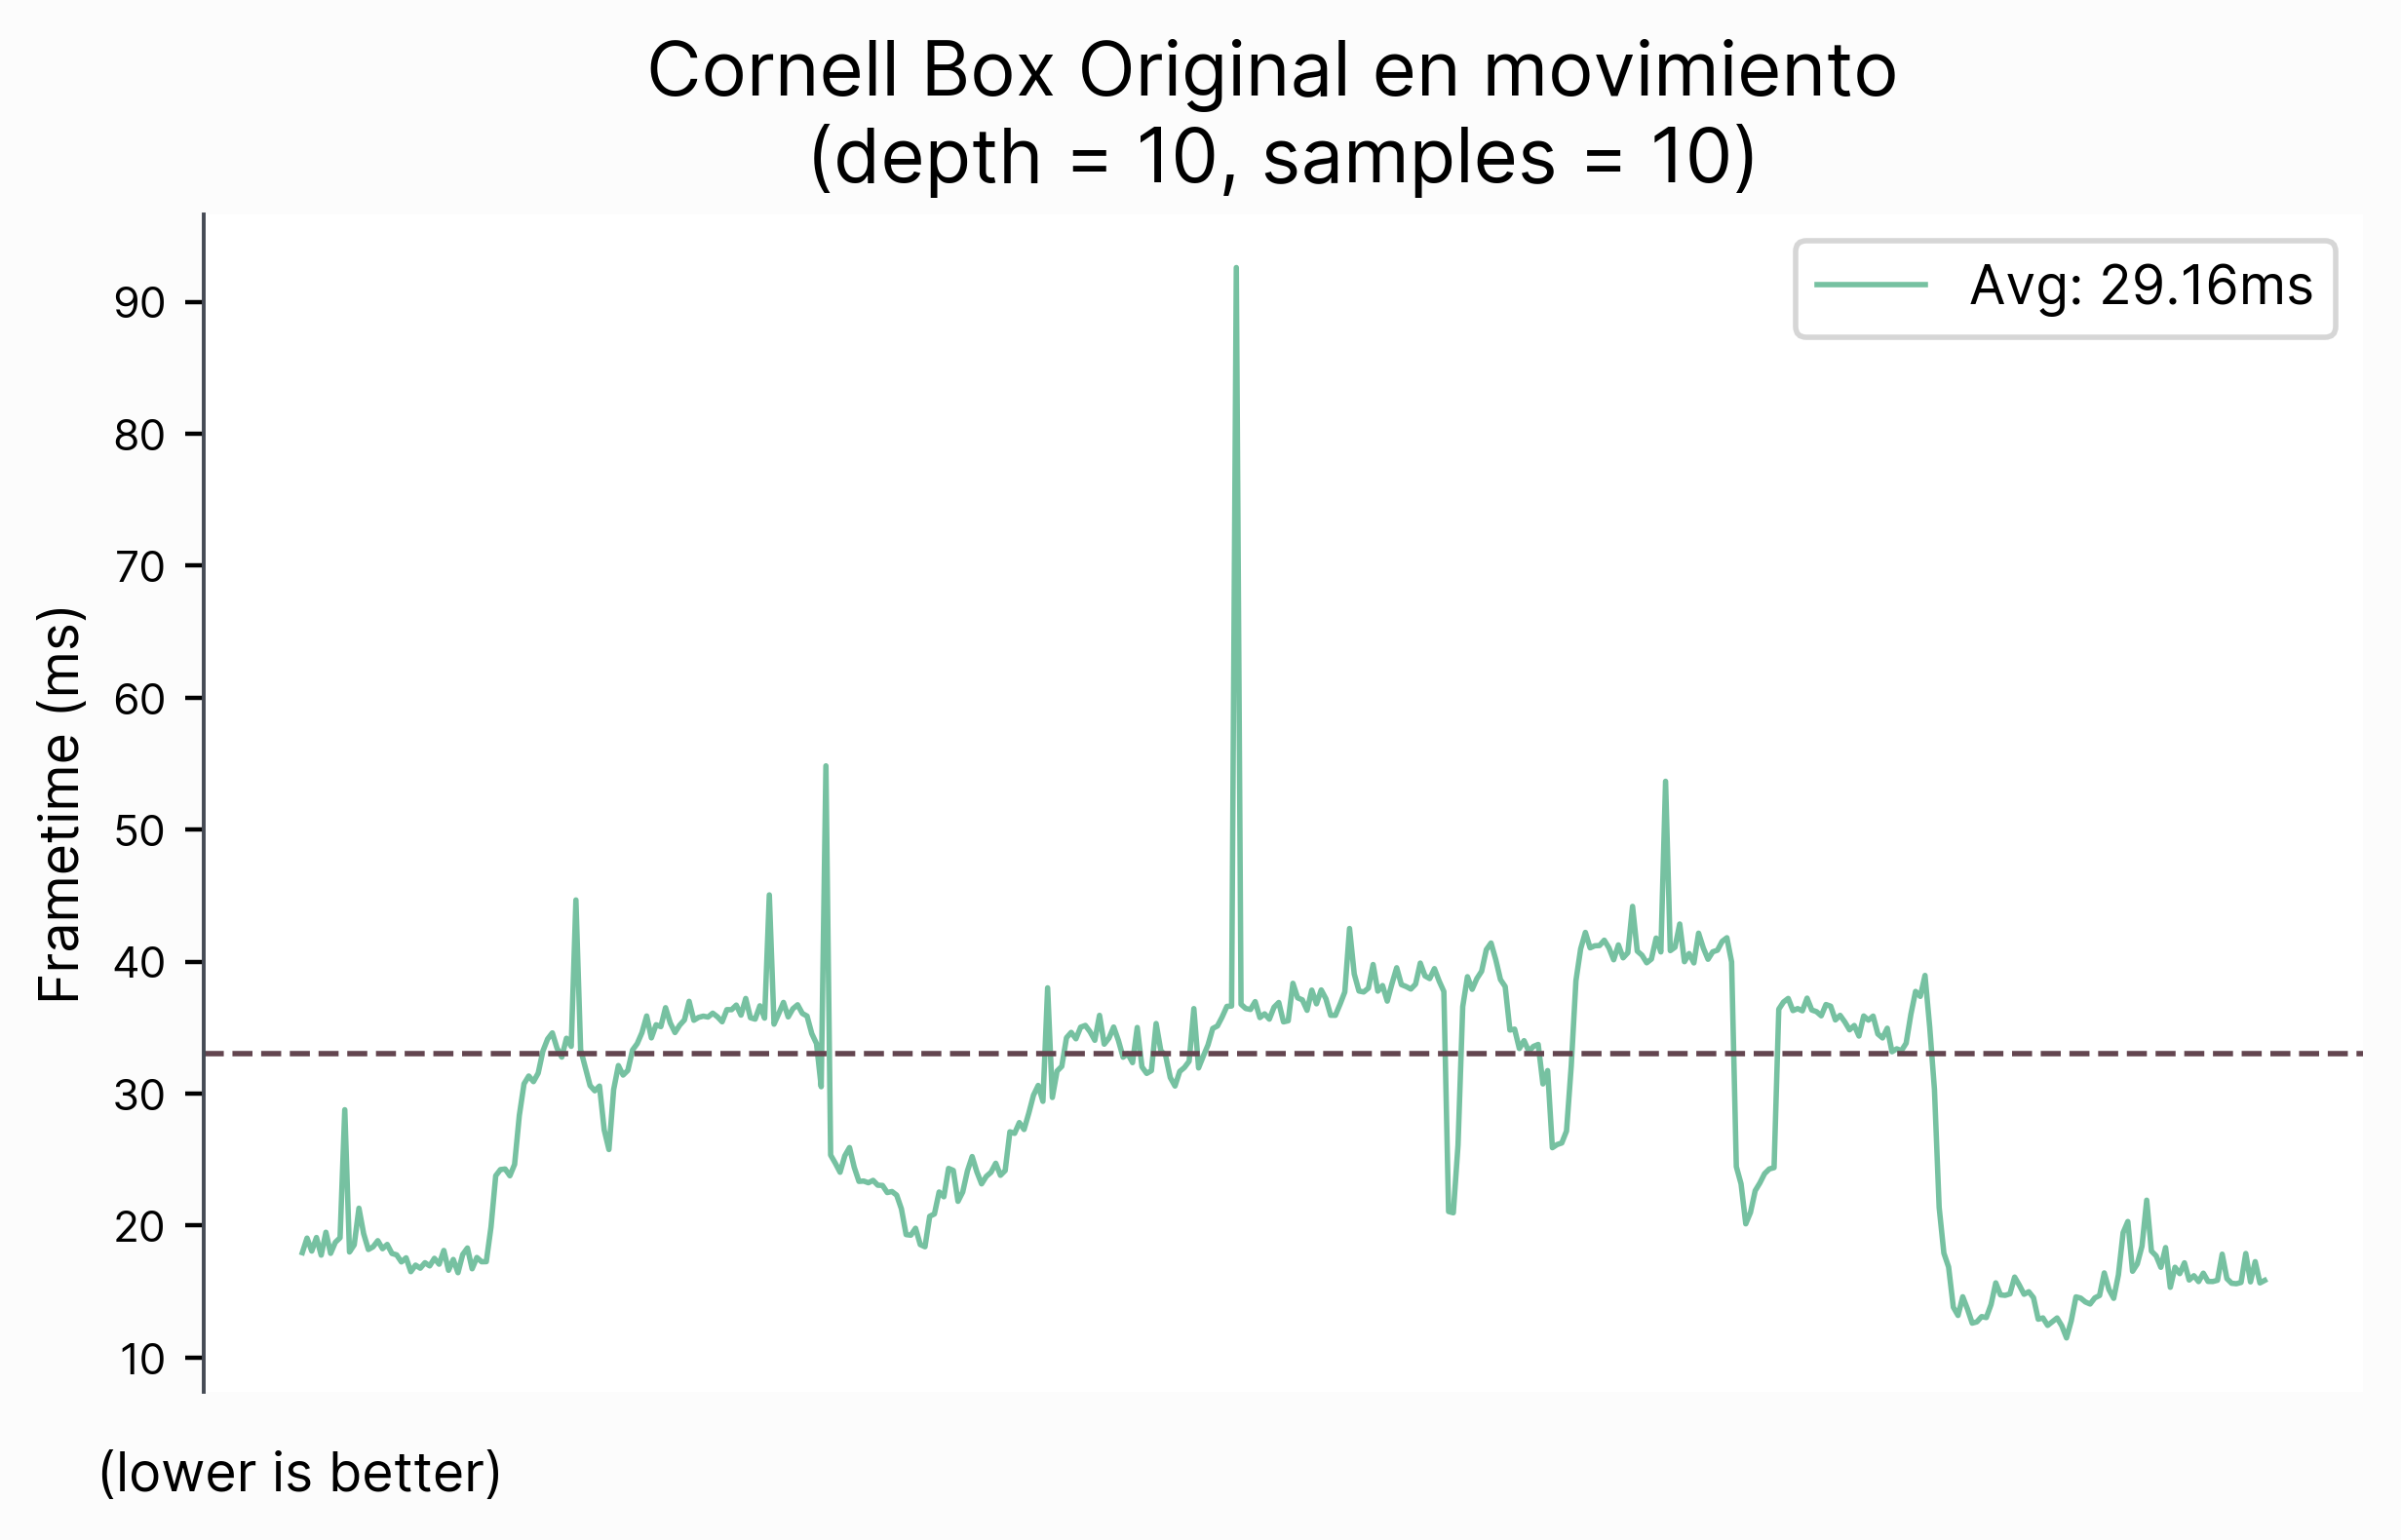

In [107]:
crear_grafica(
    pd.read_csv('./csv/CB_original_d10_a100_n10_moving.csv'), 
    "Cornell Box Original en movimiento \n(depth = 10, samples = 10)",
    "CB_original_d10_a100_n10_moving", 
    True
).show()

In [102]:
def grafica_comparativa(dfs, labels, colores, titulo, filename, save_to_file = False, filepath = "../docs/img/graficas"):
    # df está preparado para haber sido leído desde `afterburner_parser.py`
    
    assert(len(dfs) <= len(colores))
    assert(len(dfs) == len(labels))

    width, height = plt.figaspect(0.56)
    plt.figure(figsize=(width,height), dpi=400)

    # Quitar los ejes innecesarios
    ax = plt.axes()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.set_xticks([])
    
    plt.title(titulo)

    # Comprimimos todos al mismo intervalo
    minimo = len(dfs[0])
    for df in dfs:
        if len(df) < minimo:
            minimo = len(df)

    for i in range(len(dfs)):
        plt.plot(
            dfs[i]['Frametime'][:minimo], 
            color = colores[i],
            label = labels[i]
        )

    plt.axhline(y=33, color=rojo_oscurisimo, linestyle='--')
    plt.legend(loc="best")
    #plt.xlabel("Tiempo")
    plt.ylabel("Frametime (ms)")

    # Texto abajo a la izquierda
    left, width = -0.05, .75
    bottom, height = -0.05, .5
    ax.text(left, bottom, '(lower is better)',
        horizontalalignment = 'left',
        verticalalignment   = 'top',
        transform           = ax.transAxes
    )
    
    if save_to_file:
        if not os.path.exists(filepath):
            os.mkdir(filepath)
        
        file = os.path.join(filepath, filename) +'.png'
        
        print(f"Guardando en el archivo {file}")
        plt.savefig(file)

    return plt

Guardando en el archivo ../docs/img/graficas\CB_original_comparativa_samples.png


<module 'matplotlib.pyplot' from 'c:\\Users\\Andre\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

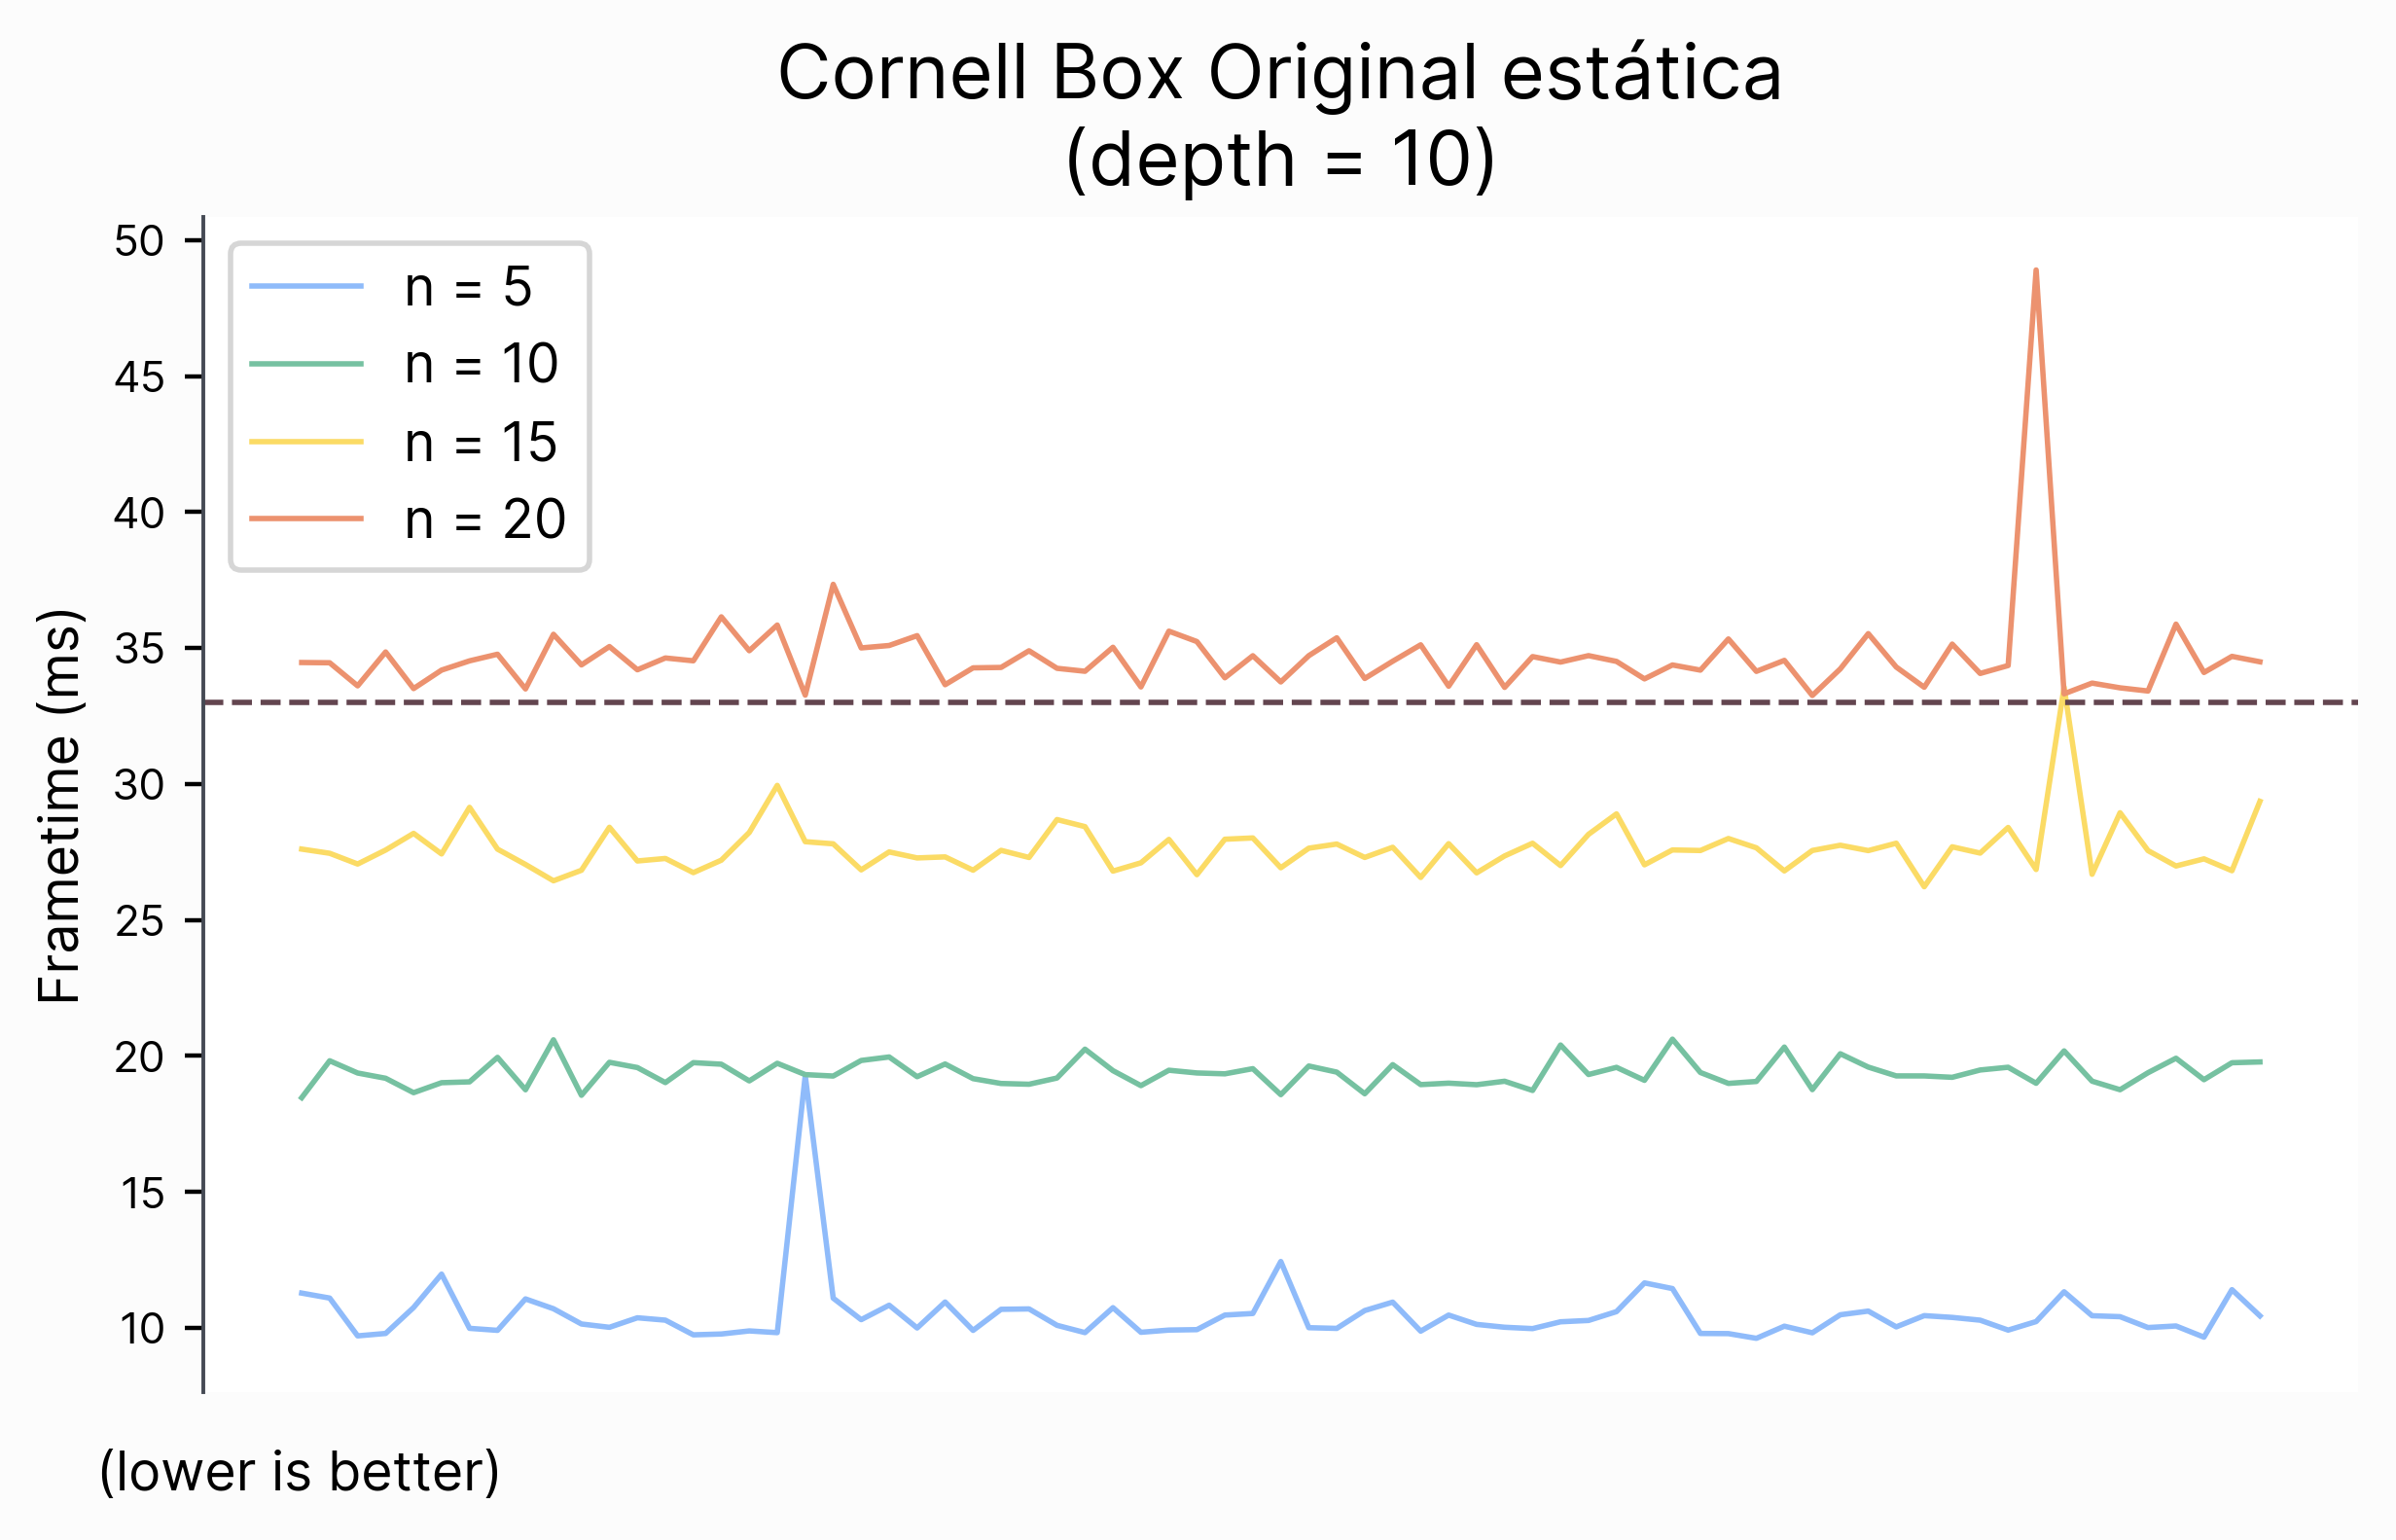

In [103]:
dfs = [
    pd.read_csv('./csv/CB_original_d10_a100_n05.csv'),
    pd.read_csv('./csv/CB_original_d10_a100_n10.csv'), 
    pd.read_csv('./csv/CB_original_d10_a100_n15.csv'), 
    pd.read_csv('./csv/CB_original_d10_a100_n20.csv')
]
labels = [
    "n = 5",
    "n = 10",
    "n = 15",
    "n = 20"
]
colores = [
    azul_primario, 
    verde_primario, 
    amarillo_primario,
    naranja_primario
] 

grafica_comparativa(
    dfs, labels, colores,
    "Cornell Box Original estática\n(depth = 10)", 
    "CB_original_comparativa_samples",
    True
)

Guardando en el archivo ../docs/img/graficas\CB_original_comparativa_depth.png


<module 'matplotlib.pyplot' from 'c:\\Users\\Andre\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

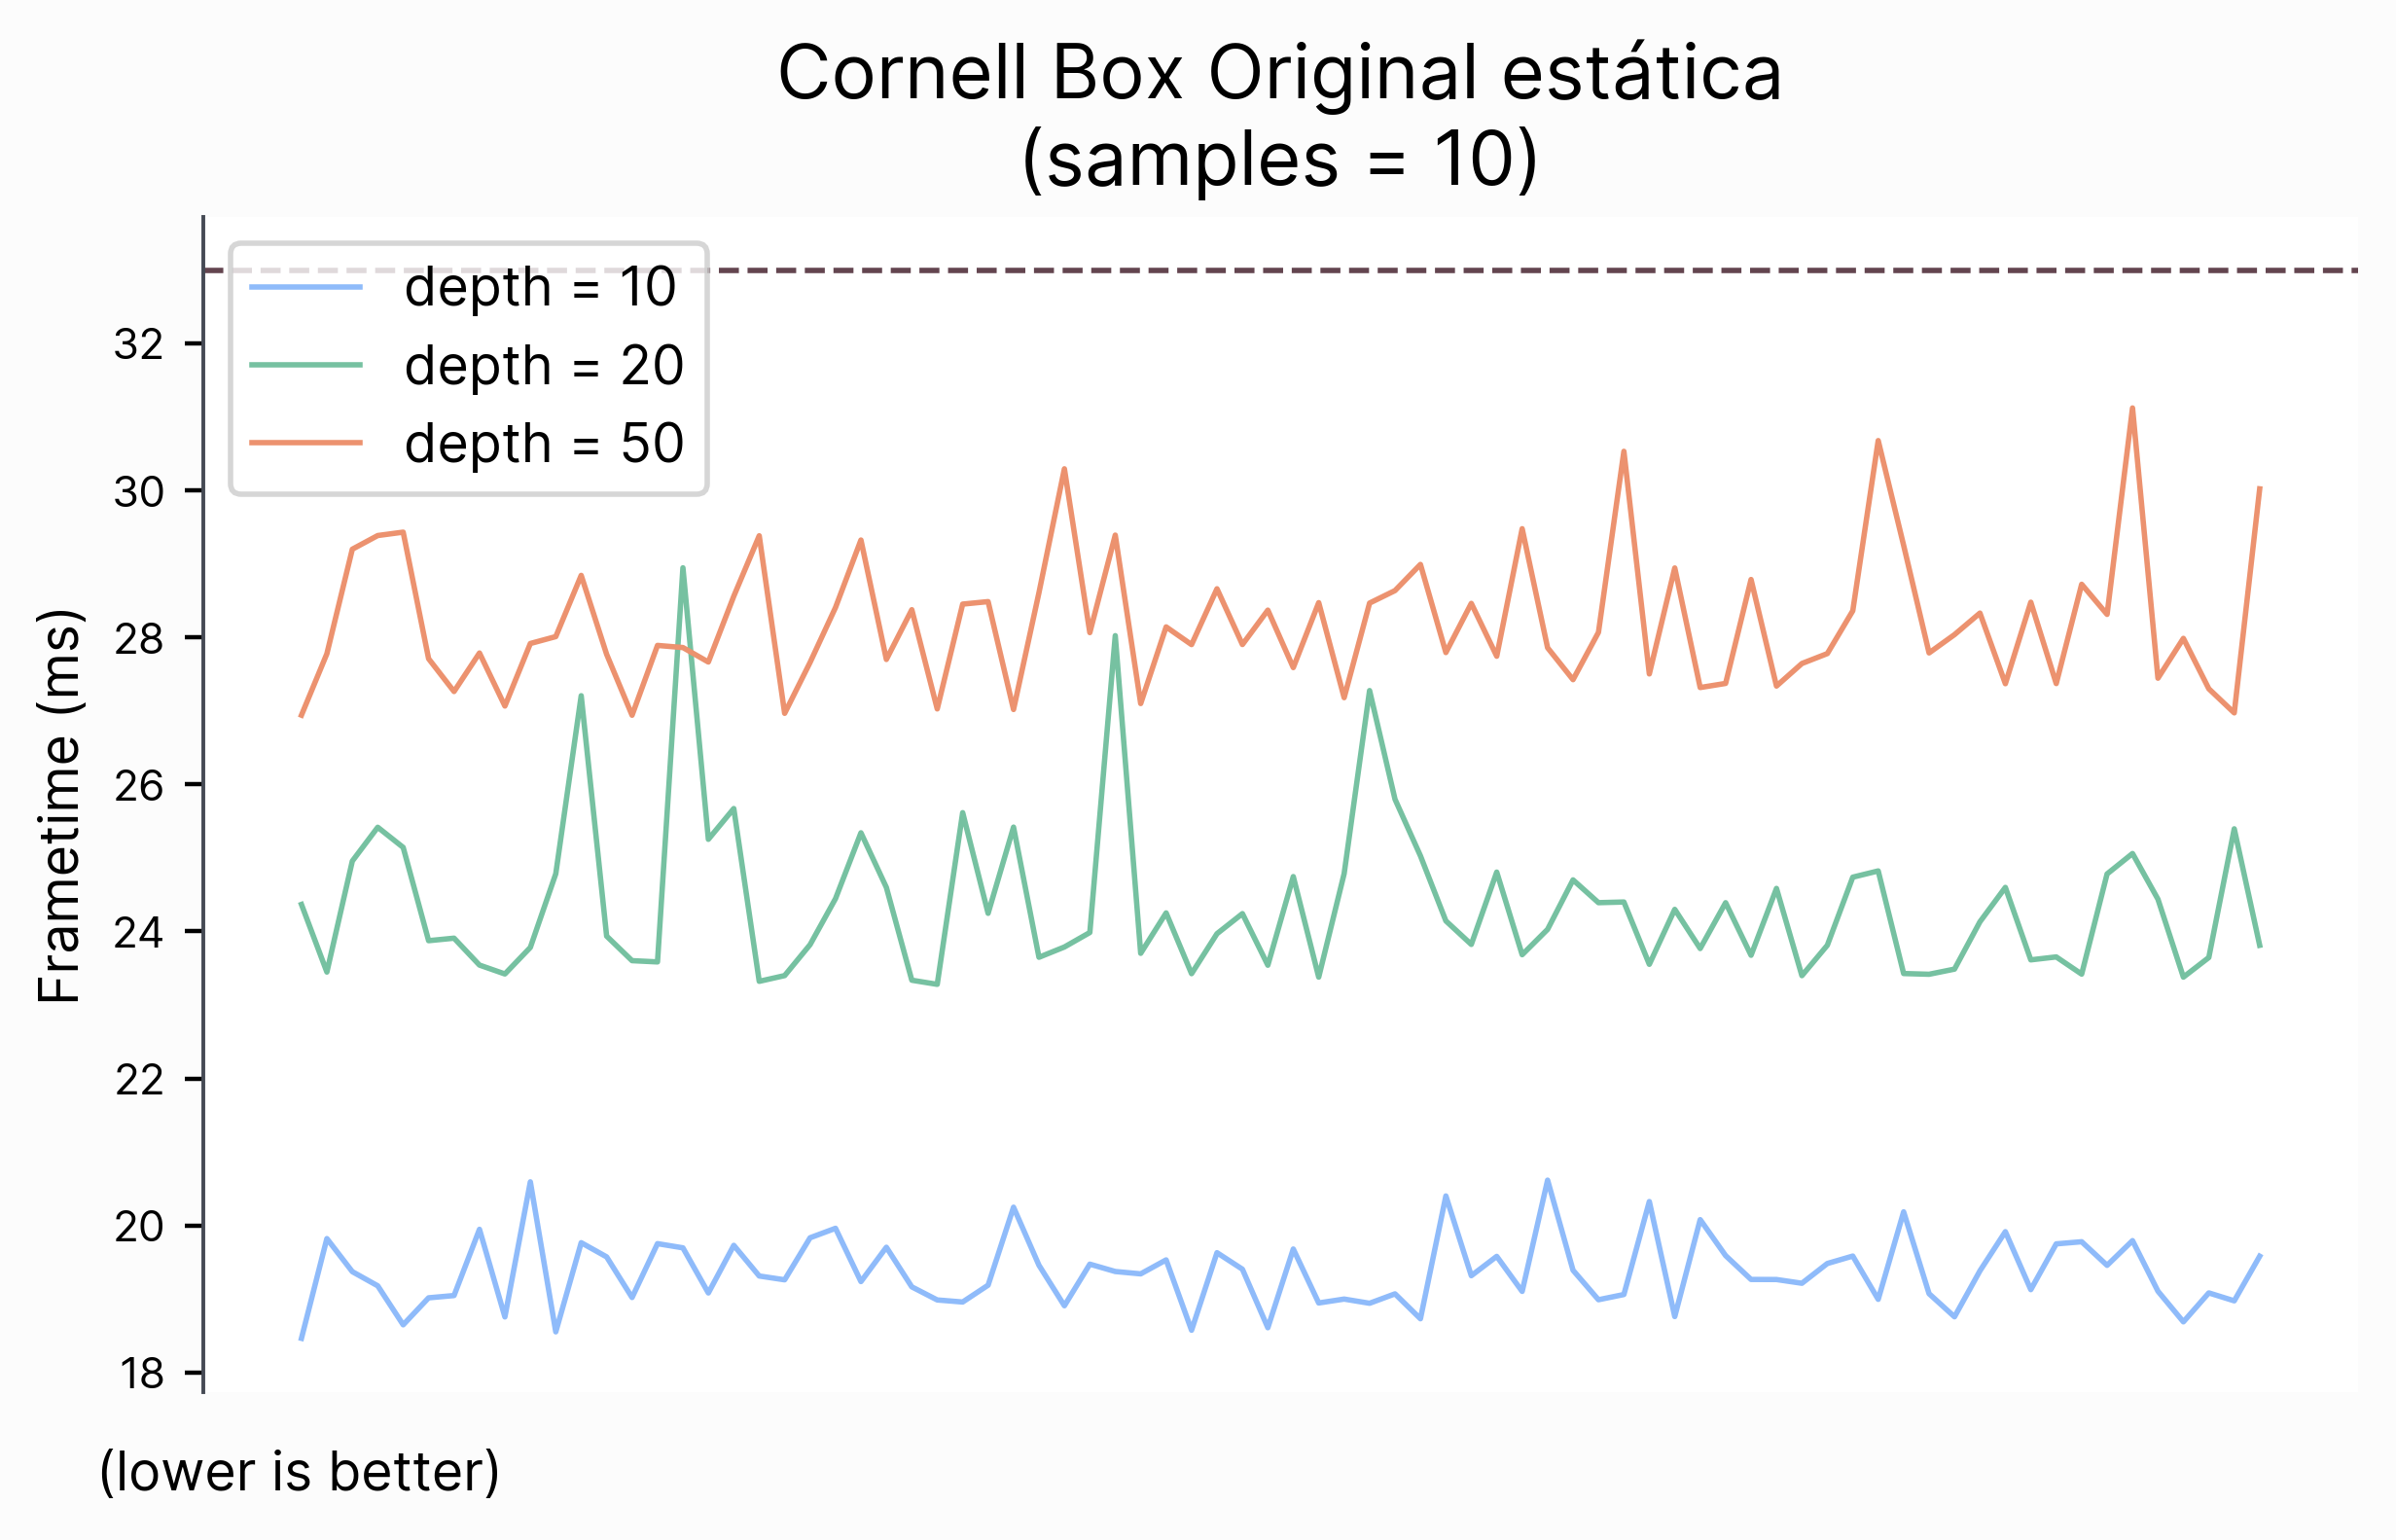

In [104]:
dfs = [
    pd.read_csv('./csv/CB_original_d10_a100_n10.csv'),
    pd.read_csv('./csv/CB_original_d20_a100_n10.csv'), 
    pd.read_csv('./csv/CB_original_d50_a100_n10.csv'),
]
labels = [
    "depth = 10", 
    "depth = 20", 
    "depth = 50"
]
colores = [
    azul_primario, 
    verde_primario, 
    naranja_primario
] 

grafica_comparativa(
    dfs, labels, colores,
    "Cornell Box Original estática\n(samples = 10)", 
    "CB_original_comparativa_depth",
    True
)